In [24]:
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
#MSE - test
from sklearn.metrics import mean_squared_error
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Pepare data
pre_data = pd.read_csv('preprocessed_data.csv')
pre_data = pre_data.drop(['holiday', 'temp_mean'], axis=1)
pre_data = pre_data[:-1]
pre_data.head()

,date,total power consumption
0,2011-11-23,90.39
1,2011-11-24,213.41
2,2011-11-25,303.99
3,2011-11-26,420.98
4,2011-11-27,444.88


<AxesSubplot:>

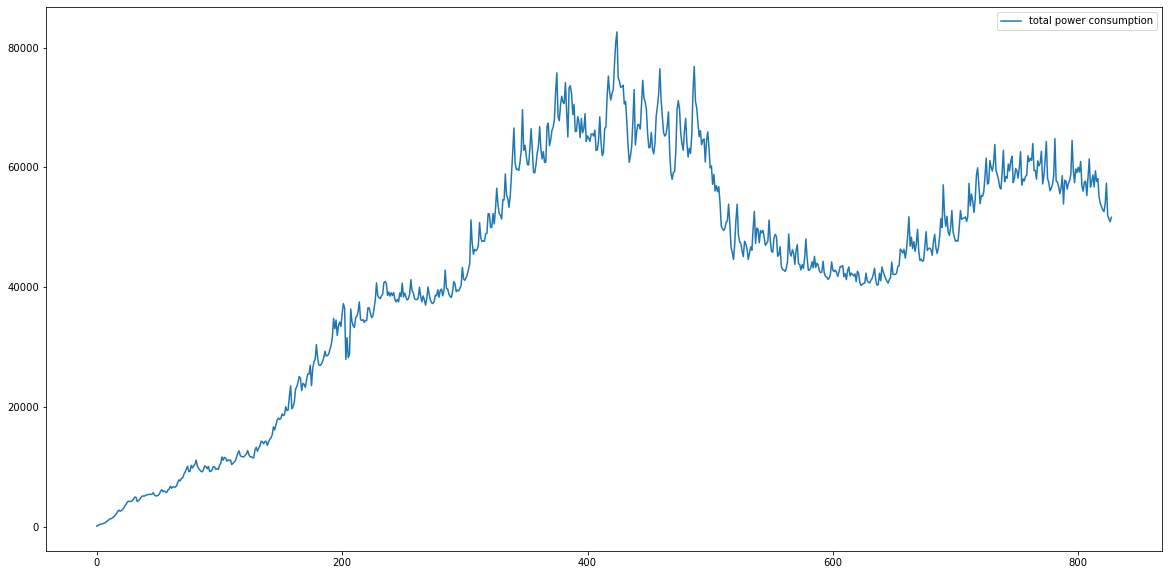

In [5]:
# plot time series graph of power consumption
pre_data.plot(figsize=(20,10))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

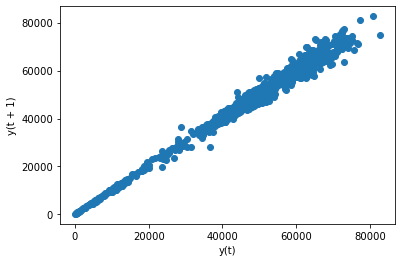

In [6]:
# lag plot 
lag_plot(pre_data['total power consumption'], lag=1)
# Strong Correlation

In [7]:
# Simple Moving Average
power_ma_ewma = pre_data
for i in [3, 7, 30]:
    power_ma_ewma['ma_{}'.format(i)] = power_ma_ewma['total power consumption'].rolling(i).mean()
power_ma_ewma

,date,total power consumption,ma_3,ma_7,ma_30
0,2011-11-23,90.39,NaN,NaN,NaN
1,2011-11-24,213.41,NaN,NaN,NaN
2,2011-11-25,303.99,202.596667,NaN,NaN
3,2011-11-26,420.98,312.793333,NaN,NaN
4,2011-11-27,444.88,389.950000,NaN,NaN
...,...,...,...,...,...
823,2014-02-23,57379.09,54652.553333,54204.118571,57582.851000
824,2014-02-24,51994.55,54439.836667,53764.268571,57352.866000
825,2014-02-25,51423.51,53599.050000,53395.265714,56916.095000
826,2014-02-26,50943.31,51453.790000,53035.950000,56628.584667


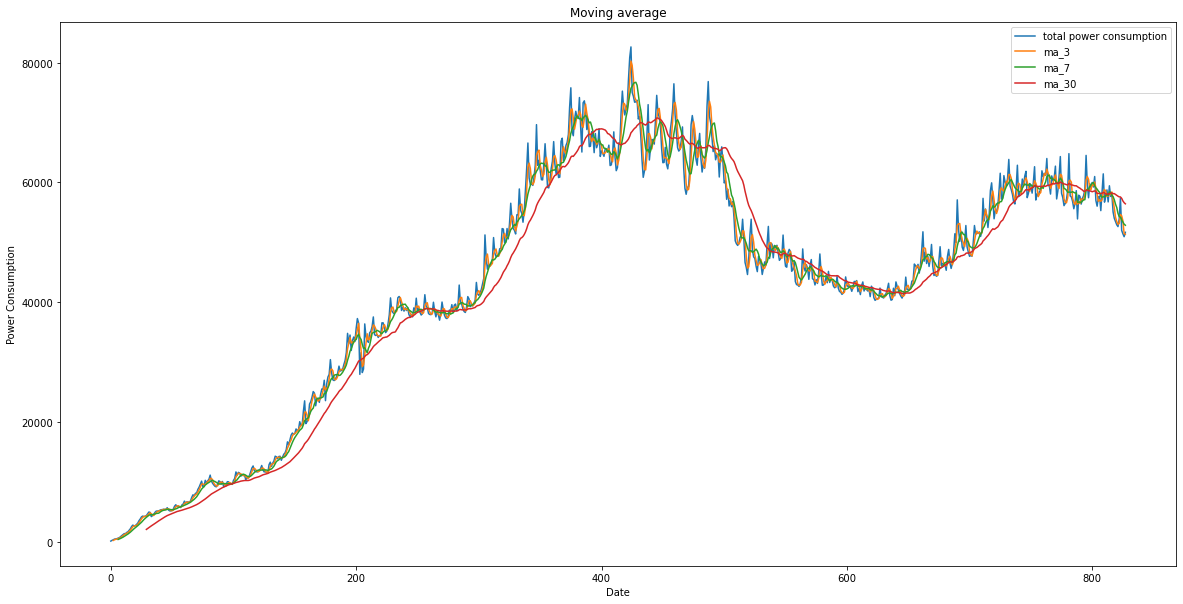

In [8]:
# Plot ma
power_ma_ewma[['total power consumption', 'ma_3','ma_7', 'ma_30']].plot(figsize=(20,10))
plt.title('Moving average')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

<AxesSubplot:>

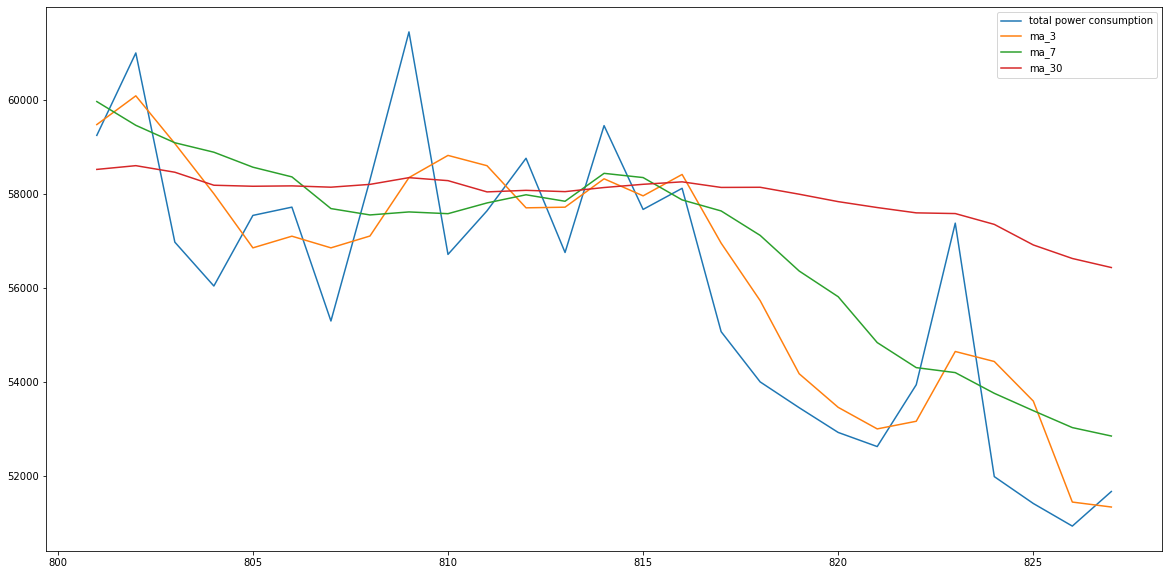

In [9]:
# Last month
power_ma_ewma.iloc[-27:][['total power consumption', 'ma_3','ma_7', 'ma_30']].plot(figsize=(20,10))

In [10]:
# ewma
for i in [ 3, 7, 30]:
    power_ma_ewma['ewma_{}'.format(i)] = power_ma_ewma['total power consumption'].ewm(span=i, adjust=False).mean()
power_ma_ewma

,date,total power consumption,ma_3,ma_7,ma_30,ewma_3,ewma_7,ewma_30
0,2011-11-23,90.39,NaN,NaN,NaN,90.390000,90.390000,90.390000
1,2011-11-24,213.41,NaN,NaN,NaN,151.900000,121.145000,98.326774
2,2011-11-25,303.99,202.596667,NaN,NaN,227.945000,166.856250,111.595369
3,2011-11-26,420.98,312.793333,NaN,NaN,324.462500,230.387188,131.555668
4,2011-11-27,444.88,389.950000,NaN,NaN,384.671250,284.010391,151.770141
...,...,...,...,...,...,...,...,...
823,2014-02-23,57379.09,54652.553333,54204.118571,57582.851000,55461.986856,55081.685240,56789.934798
824,2014-02-24,51994.55,54439.836667,53764.268571,57352.866000,53728.268428,54309.901430,56480.555134
825,2014-02-25,51423.51,53599.050000,53395.265714,56916.095000,52575.889214,53588.303573,56154.294157
826,2014-02-26,50943.31,51453.790000,53035.950000,56628.584667,51759.599607,52927.055179,55818.101631


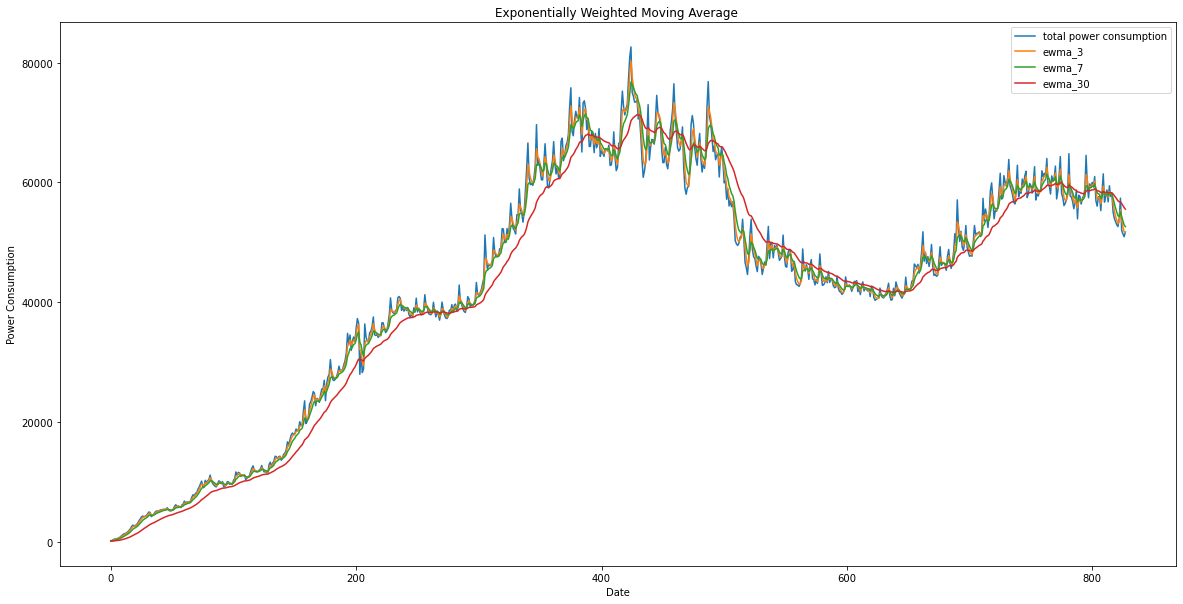

In [11]:
# Plot ewma
power_ma_ewma[['total power consumption', 'ewma_3', 'ewma_7', 'ewma_30']].plot(figsize=(20,10))
plt.title('Exponentially Weighted Moving Average ')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

<AxesSubplot:>

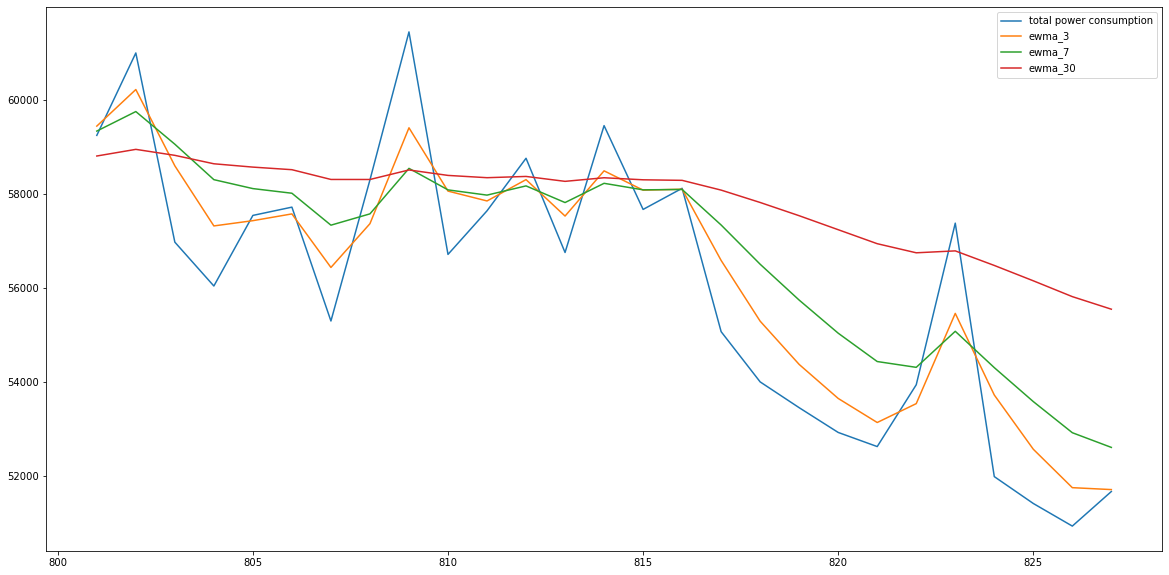

In [12]:
# Last month
power_ma_ewma.iloc[-27:][['total power consumption', 'ewma_3','ewma_7', 'ewma_30']].plot(figsize=(20,10))

In [13]:
# AR MA ARIMA

In [14]:
date_data = pd.read_csv('preprocessed_data.csv')['date']
date_data = date_data[:-1]
date_data.shape

(828,)

In [15]:
# Pepare data
pre_data = pd.read_csv('preprocessed_data.csv')
# setting date as index column
pre_data_series = pd.Series(pre_data['total power consumption'].values, index=pre_data['date'].values)
pre_data_series = pre_data_series[:-1]
pre_data_series

2011-11-23       90.39
2011-11-24      213.41
2011-11-25      303.99
2011-11-26      420.98
2011-11-27      444.88
                ...   
2014-02-23    57379.09
2014-02-24    51994.55
2014-02-25    51423.51
2014-02-26    50943.31
2014-02-27    51678.19
Length: 828, dtype: float64

In [16]:
# generate time plot
def generate_time_plot(x1, y1, x2=None, y2=None, overlay=False, title="Time Plot", label2=None, xlabel="time", ylabel="data"):
    """
    Display a time plot of x1 versus y1 with the respective x-axis and y-axis labels.
    If overlay is True, x2 and y2 arguments need to be supplied to plot an overlay time plot.
    """
    plt.figure(figsize=(14,7))
    plt.plot(x1, y1, 'k-', label="data", color='green', linewidth=1)
    if overlay:
        plt.plot(x2, y2, 'b-', label=label2, color='red', linewidth=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.5)
    plt.legend();

In [17]:
train = 828*80/100 # 663
test = 828 - 663
test

165

In [18]:
# train 70 - test 30split 
power_train = pre_data_series[:-test]
date_train = date_data[:-test]
power_test = pre_data_series[-test:]
date_test = date_data[-test:]

In [19]:
# adf
def print_adf_result(adf_result):
    df_results = pd.Series(adf_result[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
    
    for key, value in adf_result[4].items():
        df_results['Critical Value (%s)'% key] = value
    print('Augmented Dickey-Fuller Test Results:')
    print(df_results)
    

result = adfuller(power_train, maxlag=12)
print_adf_result(result)
# p value larger than 0.05 = not stationary 

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.966250
P-Value                   0.301565
# Lags Used              11.000000
# Observations Used     651.000000
Critical Value (1%)      -3.440435
Critical Value (5%)      -2.865990
Critical Value (10%)     -2.569140
dtype: float64


Text(0.5, 1.0, 'power usage')

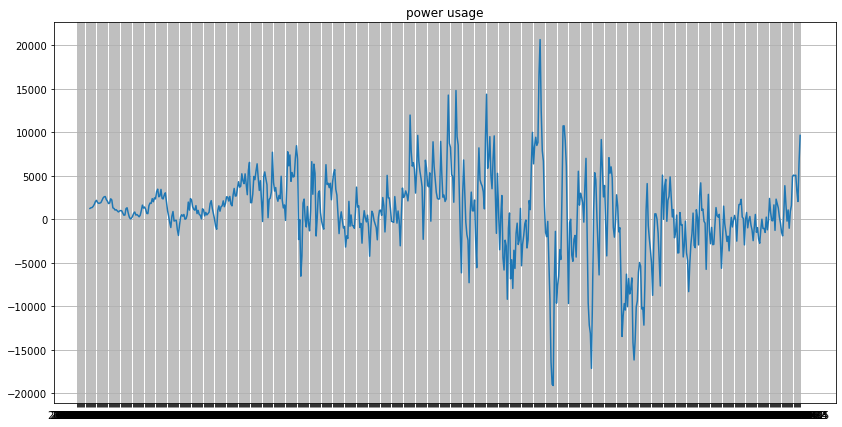

In [20]:
# seasonal differencing
power_train_diff = power_train.diff(12)

# plot time plot
plt.figure(figsize=(14,7))
plt.grid()
plt.plot(power_train_diff)
plt.title('power usage')

In [21]:
# ADF again
result = adfuller(power_train_diff.dropna())
print_adf_result(result)
# p value lower than 0.05 = obtain stationary

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -4.583075
P-Value                   0.000139
# Lags Used              19.000000
# Observations Used     631.000000
Critical Value (1%)      -3.440756
Critical Value (5%)      -2.866131
Critical Value (10%)     -2.569215
dtype: float64


AR(1)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  651
Model:                     ARMA(5, 1)   Log Likelihood               -6059.207
Method:                       css-mle   S.D. of innovations           2663.990
Date:                Sun, 04 Apr 2021   AIC                          12134.415
Time:                        20:49:47   BIC                          12170.243
Sample:                    12-05-2011   HQIC                         12148.310
                         - 09-15-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        830.0500    673.640      1.232      0.218    -490.261    2150.361
ar.L1.y        1.3450      0.087     15.469      0.000       1.175       1.515
ar.L2.y       -0.7600      0.095     -7.984   

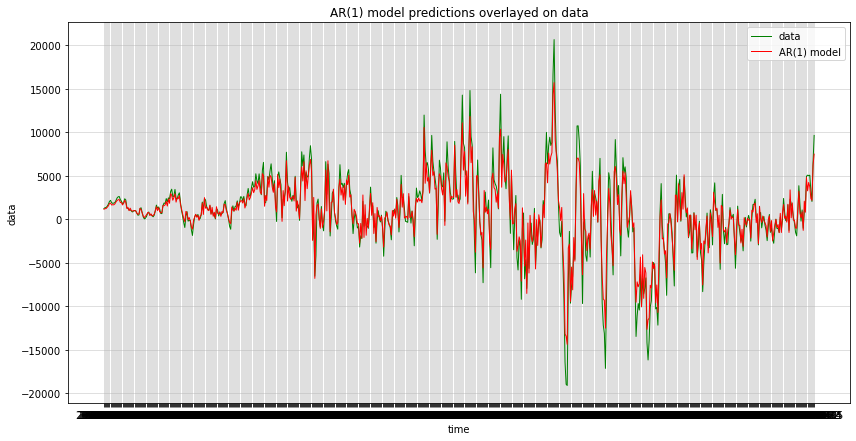

In [32]:
# AR
# for p in range(1,6):
model = ARMA(power_train_diff[12:], (p,1)).fit()
ar_pred = model.predict(start=1, end=power_train_diff[12:].shape[0])
generate_time_plot(date_train[12:], power_train_diff[12:], date_train[12:], model.predict(start=1, end=power_train_diff[12:].shape[0]), overlay=True, 
               title=f"AR({1}) model predictions overlayed on data", label2=f"AR({1}) model")
print(f"AR({1})")
print(model.summary())
print("\n\n")

In [29]:
rmse = mean_squared_error(power_train_diff[12:], ar_pred, squared=False)
print('Train RMSE: ', rmse)

Test RMSE:  1306.8189191069257


In [ ]:
model = ARMA(power_train_diff[12:], (p,1)).fit()
ar_pred = model.predict(start=1, end=power_train_diff[12:].shape[0])
generate_time_plot(date_train[12:], power_train_diff[12:], date_train[12:], model.predict(start=1, end=power_train_diff[12:].shape[0]), overlay=True, 
               title=f"AR({p}) model predictions overlayed on data", label2=f"AR({p}) model")
print(f"AR({p})")
print(model.summary())
print("\n\n")

MA(1)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  651
Model:                     ARMA(0, 1)   Log Likelihood               -6166.032
Method:                       css-mle   S.D. of innovations           3140.040
Date:                Sun, 04 Apr 2021   AIC                          12338.064
Time:                        20:50:46   BIC                          12351.500
Sample:                    12-05-2011   HQIC                         12343.275
                         - 09-15-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        837.7573    218.191      3.840      0.000     410.110    1265.404
ma.L1.y        0.7741      0.024     32.561      0.000       0.728       0.821
                                    Roots     

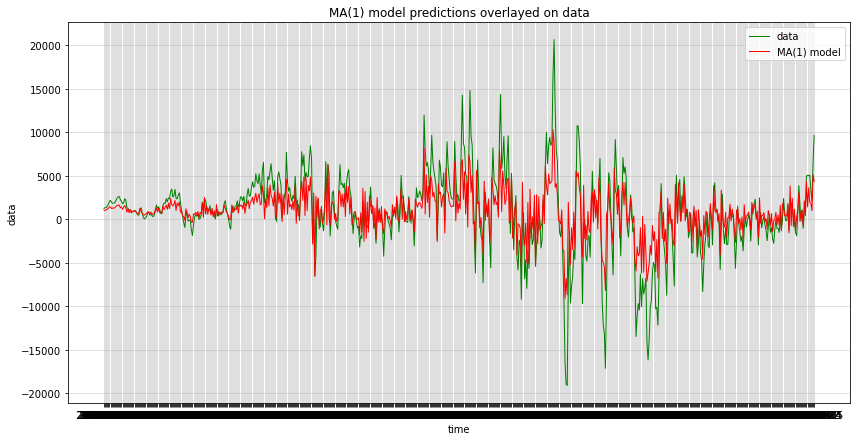

In [34]:
# MA
# plot different orders (q's)  
model = ARMA(power_train_diff[12:], (0,1)).fit()
ma_pred = model.predict(start=1, end=power_train_diff[12:].shape[0])
generate_time_plot(date_train[12:], power_train_diff[12:], date_train[12:], model.predict(start=1, end=power_train_diff[12:].shape[0]), overlay=True, 
               title=f"MA({1}) model predictions overlayed on data", label2=f"MA({1}) model")
print(f"MA({1})")
print(model.summary())
print("\n\n")

In [ ]:
rmse = mean_squared_error(power_train_diff[12:], ar_pred, squared=False)
print('Train RMSE: ', rmse)

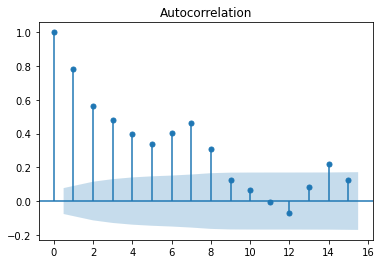

In [22]:
# plot ACF plot -> MA
plot_acf(power_train_diff.dropna(), lags=range(0,16));

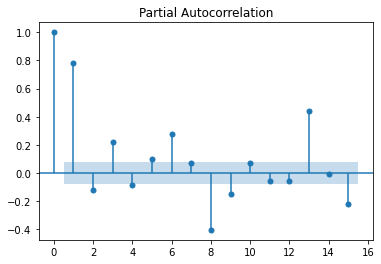

In [23]:
# plot PACF plot -> AR
plot_pacf(power_train_diff.dropna(), lags=range(0,16));

In [24]:
# fitting ARIMA(1,0,1) model
arima = ARIMA(power_train_diff.dropna(), order=(8,0,7)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  651
Model:                     ARMA(8, 7)   Log Likelihood               -5864.435
Method:                       css-mle   S.D. of innovations           1939.683
Date:                Sun, 04 Apr 2021   AIC                          11762.871
Time:                        20:26:22   BIC                          11839.005
Sample:                    12-05-2011   HQIC                         11792.399
                         - 09-15-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        829.9375    547.111      1.517      0.129    -242.380    1902.255
ar.L1.y        2.0482      0.038     54.067      0.000       1.974       2.122
ar.L2.y       -2.1648      0.075    -28.915      0.000      -2.312      -2.018
ar.L3.y        1.3821      0.093     14.857      0.000       1.200       1.564
ar.L4.y       -0.3834      0.102     -3.770      0.000      -0.583      -0.184
ar.L5.y       -0.7928      0.101     -7.868      0.000      -0.990      -0.595
ar.L6.y        1.6589      0.090     18.401      0.000       1.482       1.836
ar.L7.y       -1.3673      0.072    -19.056      0.000      -1.508      -1.227
ar.L8.y        0.4421      0.037     11.966      0.000       0.370       0.515
ma.L1.y       -1.2975      0.021    -60.850      0.000      -1.339      -1.256
ma.L2.y        1.1893      0.038     31.324      0.000       1.115       1.264
ma.L3.y       -0.1955      0.033     -5.896      0.000      -0.260      -0.130
ma.L4.y       -0.3439      0.028    -12.296      0.000      -0.399      -0.289
ma.L5.y        1.1890      0.038     31.026      0.000       1.114       1.264
ma.L6.y       -1.2036      0.032    -37.941      0.000      -1.266      -1.141
ma.L7.y        0.9458      0.016     57.403      0.000       0.913       0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1134           -0.0000j            1.1134           -0.5000
AR.2           -0.2244           -0.9769j            1.0023           -0.2859
AR.3           -0.2244           +0.9769j            1.0023            0.2859
AR.4            0.6258           -0.8318j            1.0409           -0.1473
AR.5            0.6258           +0.8318j            1.0409            0.1473
AR.6            1.0632           -0.5754j            1.2089           -0.0789
AR.7            1.0632           +0.5754j            1.2089            0.0789
AR.8            1.2770           -0.0000j            1.2770           -0.0000
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2           -0.2320           -1.0017j            1.0282           -0.2862
MA.3           -0.2320           +1.0017j            1.0282            0.2862
MA.4            0.8644           -0.5029j            1.0001           -0.0839
MA.5            0.8644           +0.5029j            1.0001            0.0839
MA.6            0.5039           -0.8638j            1.0000           -0.1660
MA.7            0.5039           +0.8638j            1.0000            0.1660
-----------------------------------------------------------------------------
"""

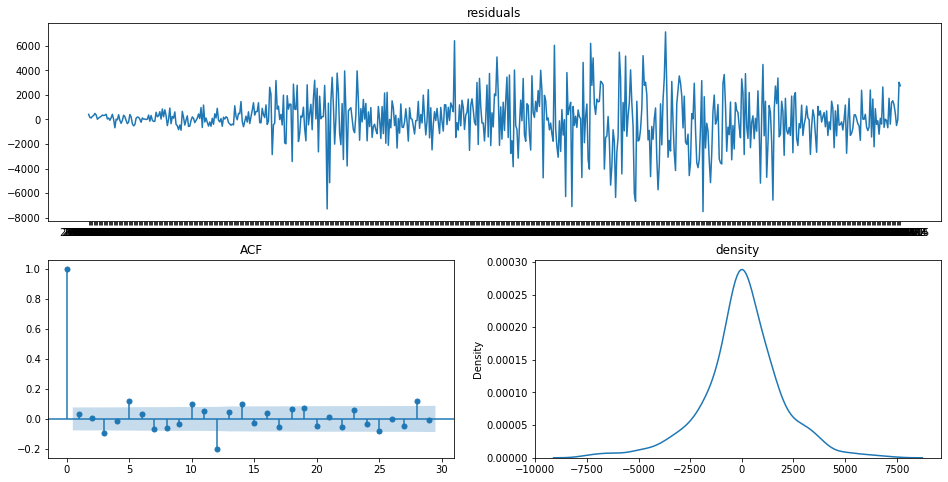

In [25]:
residuals = pd.Series(arima.resid)
def check_residuals(series):
    fig = plt.figure(figsize=(16, 8))    
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series)
    ax1.set_title('residuals')
    
    ax2 = fig.add_subplot(gs[1,0])
    plot_acf(series, ax=ax2, title='ACF')
    
    ax3 = fig.add_subplot(gs[1,1])
    sns.kdeplot(series, ax=ax3)
    ax3.set_title('density')
    
    plt.show()
    
check_residuals(residuals)

In [26]:
# Prediction test
arima_forecast, se, conf = arima.forecast(test)

arima_forecast = pd.Series(arima_forecast, index=power_test.index)
lower_series = pd.Series(conf[:, 0], index=power_test.index)
upper_series = pd.Series(conf[:, 1], index=power_test.index)

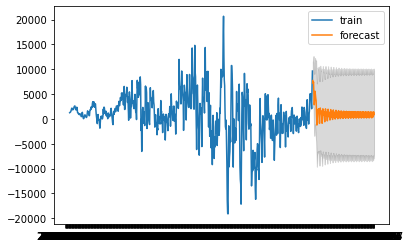

In [27]:
plt.plot(power_train_diff, label='train')
plt.plot(arima_forecast, label='forecast')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.legend()

In [28]:
def inverse_differencing(orig_data, diff_data, interval):
    output = orig_data[:interval].tolist()
    for i in range(interval, len(diff_data)):
        output.append(output[i-interval] + diff_data[i])
    return output

def inverse_differencing_forecast(orig_series, diff_series, forecast_series, interval):
    series_merge = diff_series.append(forecast_series)
    inverse_diff_series = pd.Series(inverse_differencing(orig_series, series_merge, interval), 
                                    index=series_merge.index)
    return inverse_diff_series[-len(forecast_series):]

def train_test_forecast_plot(train_series, test_series, forecast_series, lower_upper=None):
    plt.plot(train_series, label = 'train')
    plt.plot(test_series, label = 'test')
    plt.plot(forecast_series, label = 'forecast')

    if lower_upper is not None:
        plt.fill_between(lower_upper[0].index, lower_upper[0], 
                     lower_upper[1], color='k', alpha=.15)
    plt.legend()

In [29]:
# inverse differenced series back to original series
forecast_series = inverse_differencing_forecast(power_train, power_train_diff, arima_forecast, 12)
lower_series = inverse_differencing_forecast(power_train, power_train_diff, lower_series, 12)
upper_series = inverse_differencing_forecast(power_train, power_train_diff, upper_series, 12)

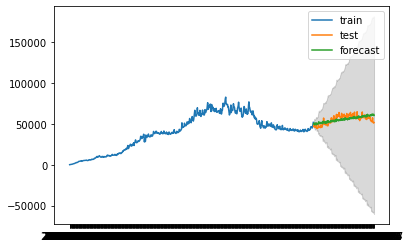

In [30]:
train_test_forecast_plot(power_train, power_test, forecast_series, 
                         [lower_series, upper_series])

In [31]:
#MSE - test
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(power_test, forecast_series, squared=False)
print('Test RMSE: ', rmse)

Test RMSE:  3973.5204734875538


In [32]:
# SARIMA
%matplotlib inline

from pathlib import Path
import sys
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

sarimax = SARIMAX(power_train.dropna(), order=(3,1,1), seasonal_order=(0,1,0,12)).fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  663
Model:             SARIMAX(3, 1, 1)x(0, 1, [], 12)   Log Likelihood               -6074.812
Date:                             Sun, 04 Apr 2021   AIC                          12159.623
Time:                                     20:26:40   BIC                          12182.008
Sample:                                 11-23-2011   HQIC                         12168.306
                                      - 09-15-2013                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9552      0.028    -34.597      0.000      -1.009      -0.901
ar.L2         -0.3184      0.038     -8.335      0.000      -0.393      -0.244
ar.L3         -0.2567      0.032     -7.926      0.000      -0.320      -0.193
ma.L1          1.0000      0.042     23.556      0.000       0.917       1.083
sigma2      7.872e+06   5.39e-09   1.46e+15      0.000    7.87e+06    7.87e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                79.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.53   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+29. Standard errors may be unstable.
"""

In [33]:
sarimax_forecast = sarimax.get_forecast(test)
sarimax_forecast_conf_int = sarimax_forecast.conf_int()

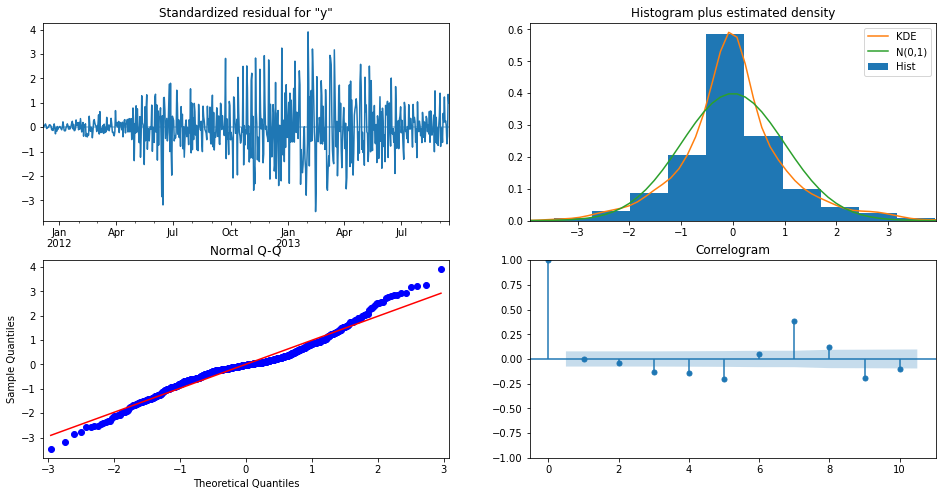

In [34]:
sarimax.plot_diagnostics(figsize=(16, 8))
plt.show()

In [35]:
plt.plot(power_train.dropna(), label='train')
plt.plot(power_test.dropna(), label='test')
plt.plot(sarimax_forecast.predicted_mean, label='forecast')


plt.fill_between(sarimax_forecast_conf_int.index,
                 sarimax_forecast_conf_int.iloc[:, 0],
                 sarimax_forecast_conf_int.iloc[:, 1], color='k', alpha=.2)

plt.legend()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [36]:
# Grid search

In [37]:
# # train 70 - test 30split 
# power_train = pre_data_series[:-test]
# power_test = pre_data_series[-test:]

Text(0.5, 1.0, 'power usage')

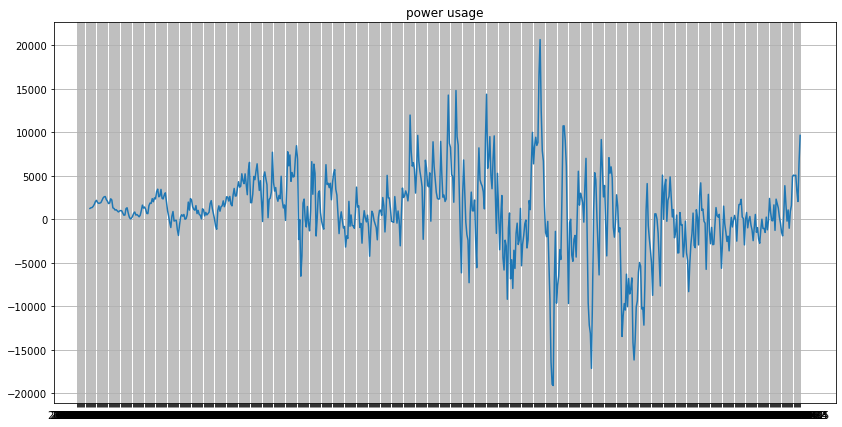

In [38]:
# # seasonal differencing
# power_train_diff = power_train.diff(12)

# # plot time plot
# plt.figure(figsize=(14,7))
# plt.grid()
# plt.plot(power_train_diff)
# plt.title('power usage')

In [ ]:
# # Grid Search
# # Data - dif= 12 (deseason)
# param_p = [0,1,2,3,4,5,6, 7, 8]
# param_d = [0,1,2] # ARIMA only support two times of differencing
# param_q = [0,1,2,3,4,5,6, 7, 8]

# best_error, best_params, best_model = None, None, None

# for p in param_p:
#     for d in param_d:
#         for q in param_q:
#             try:
#                 arima = ARIMA(power_train_diff.dropna(), order=(p,d,q)).fit()
#                 if best_error is None or arima.aic < best_error:
#                     best_error = arima.aic
#                     best_params = (p,d,q)
#                     best_model = arima
#                 print('ARIMA({},{},{}), AIC={}'.format(p,d,q, arima.aic))
#             except:
#                 pass
# print('Best Error={}, Best Params={}'.format(best_error, best_params))

ARIMA(0,0,0), AIC=12807.022661730154
ARIMA(0,0,1), AIC=12338.0644125403
ARIMA(0,0,2), AIC=12244.39586102139
ARIMA(0,0,3), AIC=12214.925045321237
ARIMA(0,0,4), AIC=12150.43908825982
ARIMA(0,0,5), AIC=12140.230795918567
ARIMA(0,0,6), AIC=12120.520837917396
ARIMA(0,0,7), AIC=12067.171302537039
ARIMA(0,0,8), AIC=nan
ARIMA(0,1,0), AIC=12242.775854790556
ARIMA(0,1,1), AIC=12244.773363450913
ARIMA(0,1,2), AIC=12157.998297894916
ARIMA(0,1,3), AIC=12155.827103694644
ARIMA(0,1,4), AIC=12156.295065058242
ARIMA(0,1,5), AIC=12124.23973703981
ARIMA(0,1,6), AIC=12122.567015721068
ARIMA(0,1,7), AIC=12094.612649994368
ARIMA(0,1,8), AIC=12083.303521391552
ARIMA(0,2,0), AIC=12673.460060357109
ARIMA(0,2,1), AIC=12233.378434356664
ARIMA(0,2,2), AIC=12235.3661198424
ARIMA(0,2,3), AIC=12149.97948825832
ARIMA(0,2,4), AIC=12148.050571861597
ARIMA(0,2,5), AIC=12148.695066644957
ARIMA(0,2,6), AIC=12119.294944636775
ARIMA(0,2,8), AIC=12090.950400524242
ARIMA(1,0,0), AIC=12190.836807864149
ARIMA(1,0,1), AIC=12172.

In [ ]:
# # Grid Search
# # Data - dif= 1 (detrend)
# param_p = [0,1,2,3,4,5,6, 7, 8, 9, 10]
# param_d = [0,1,2] # ARIMA only support two times of differencing
# param_q = [0,1,2,3,4,5,6, 7, 8, 9, 10]

# best_error, best_params, best_model = None, None, None

# for p in param_p:
#     for d in param_d:
#         for q in param_q:
#             try:
#                 arima = ARIMA(power_train_diff.dropna(), order=(p,d,q)).fit()
#                 if best_error is None or arima.aic < best_error:
#                     best_error = arima.aic
#                     best_params = (p,d,q)
#                     best_model = arima
#                 print('ARIMA({},{},{}), AIC={}'.format(p,d,q, arima.aic))
#             except:
#                 pass
# print('Best Error={}, Best Params={}'.format(best_error, best_params))